In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)
import plotly.graph_objs as go 

import os
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
weather_station_location=pd.read_csv("/Users/withmocha/Downloads/archive/Weather Station Locations.csv")
weather=pd.read_csv("/Users/withmocha/Downloads/archive/Summary of Weather.csv")

weather_station_location=weather_station_location.loc[:,
  ["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ] 

weather = weather.loc[:,["STA","Date","MeanTemp"]]



In [5]:
weather_station_location.head(5)

,WBAN,NAME,STATE/COUNTRY ID,Latitude,Longitude
0,33013,AIN EL,AL,36.383333,6.650000
1,33031,LA SENIA,AL,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,36.716667,3.216667
3,33044,TELERGMA,AL,36.116667,6.416667
4,12001,TINDOUF,AL,27.683333,-8.083333


In [6]:
weather.head(5)

,STA,Date,MeanTemp
0,10001,1942-7-1,23.888889
1,10001,1942-7-2,25.555556
2,10001,1942-7-3,24.444444
3,10001,1942-7-4,24.444444
4,10001,1942-7-5,24.444444


In [8]:
weather_station_id = weather_station_location[weather_station_location.NAME ==
                         "BINDUKURI"].WBAN

weather_bin=weather[weather.STA == int(weather_station_id)]
weather_bin["Date"]=pd.to_datetime(weather_bin["Date"])

In [9]:
weather_bin

,STA,Date,MeanTemp
78252,32907,1943-05-11,28.888889
78253,32907,1943-05-12,25.555556
78254,32907,1943-05-13,24.444444
78255,32907,1943-05-14,23.888889
78256,32907,1943-05-15,27.777778
...,...,...,...
78998,32907,1945-05-27,23.333333
78999,32907,1945-05-28,25.555556
79000,32907,1945-05-29,24.444444
79001,32907,1945-05-30,25.555556


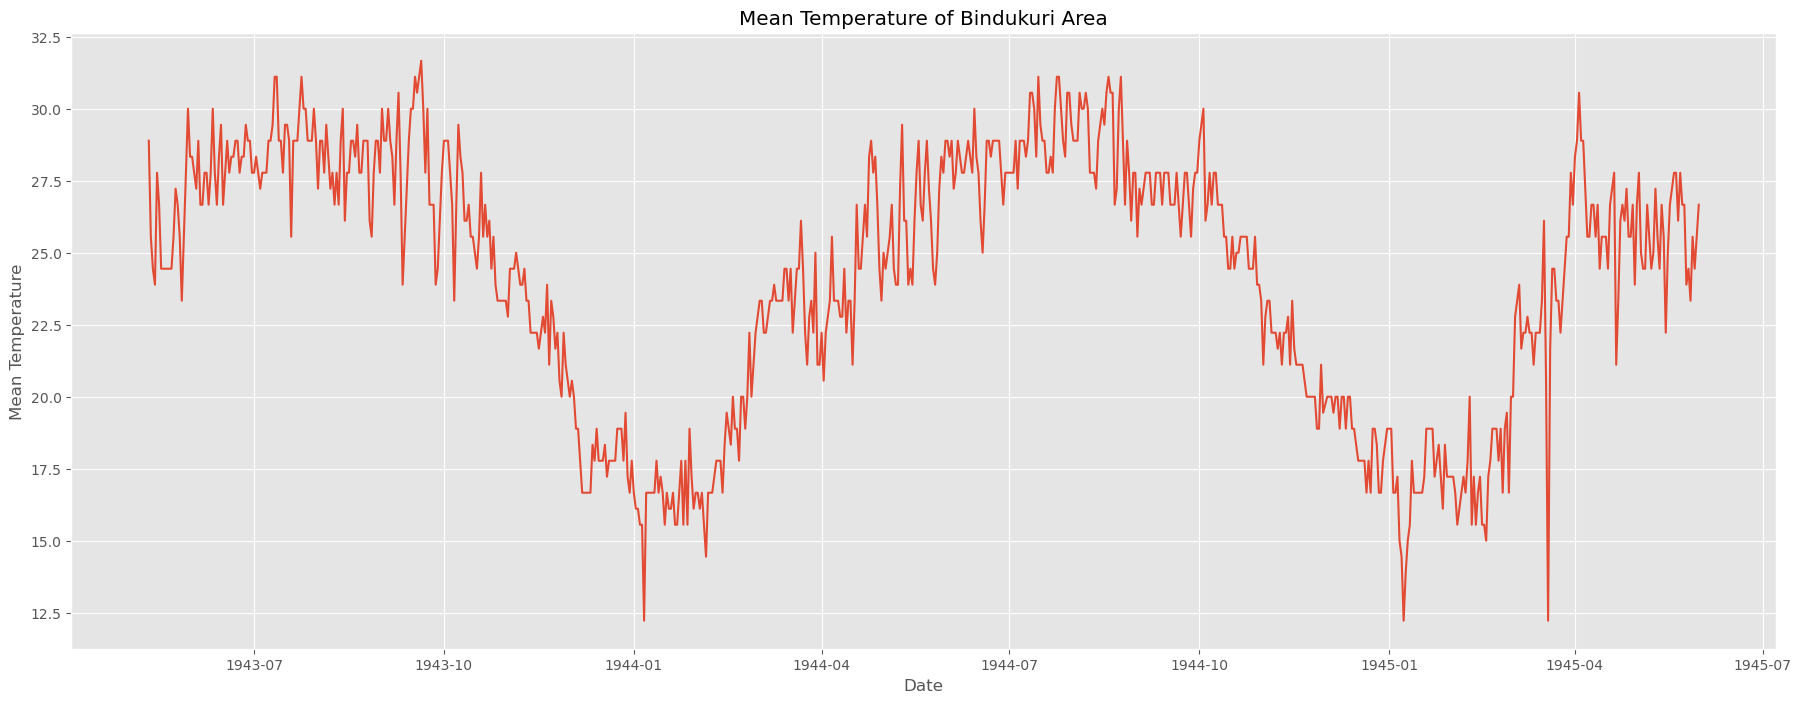

In [11]:
plt.figure(figsize=(22,8))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")

plt.show()

In [12]:
timeSeries=weather_bin.loc[:,["Date","MeanTemp"]]
timeSeries.index=timeSeries.Date
ts=timeSeries.drop("Date",axis=1)

In [13]:
ts

,MeanTemp
Date,
1943-05-11,28.888889
1943-05-12,25.555556
1943-05-13,24.444444
1943-05-14,23.888889
1943-05-15,27.777778
...,...
1945-05-27,23.333333
1945-05-28,25.555556
1945-05-29,24.444444


<Figure size 640x480 with 0 Axes>

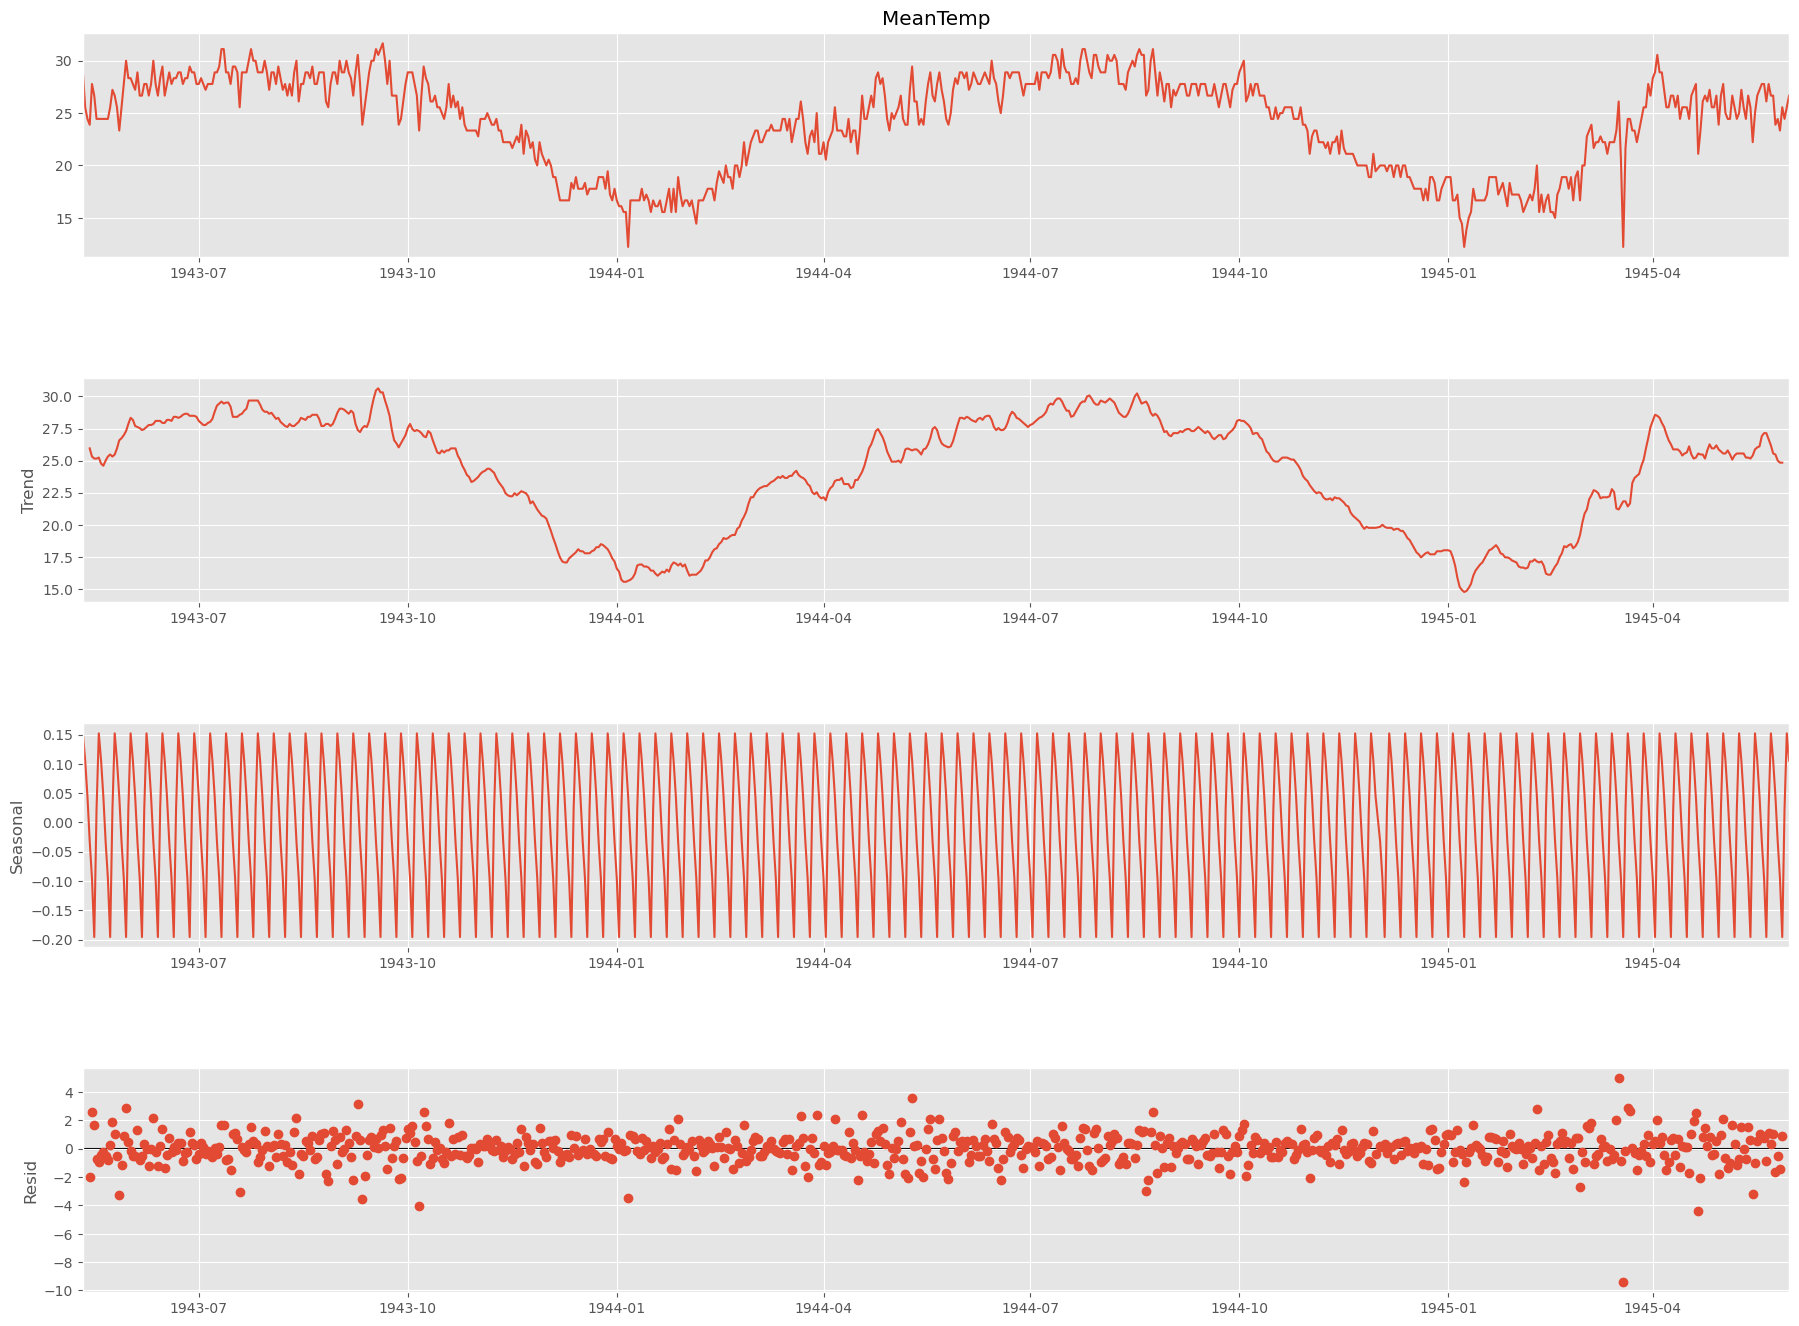

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts['MeanTemp'],model='additive', period=7)

fig=plt.figure()
fig=result.plot()
fig.set_size_inches(20,15)

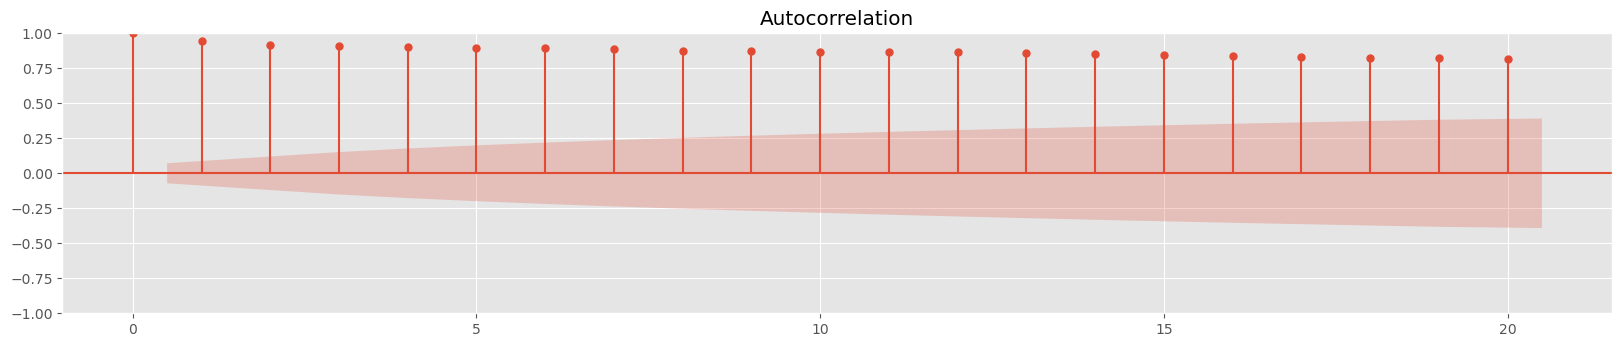

In [24]:
import statsmodels.api as sm

fig=plt.figure(figsize=(20,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(ts,lags=20,ax=ax1)

In [26]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[0])
print('Critical Values:')

for key,value in result[4].items():
    print('\t%s: %.3f'%(key,value))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


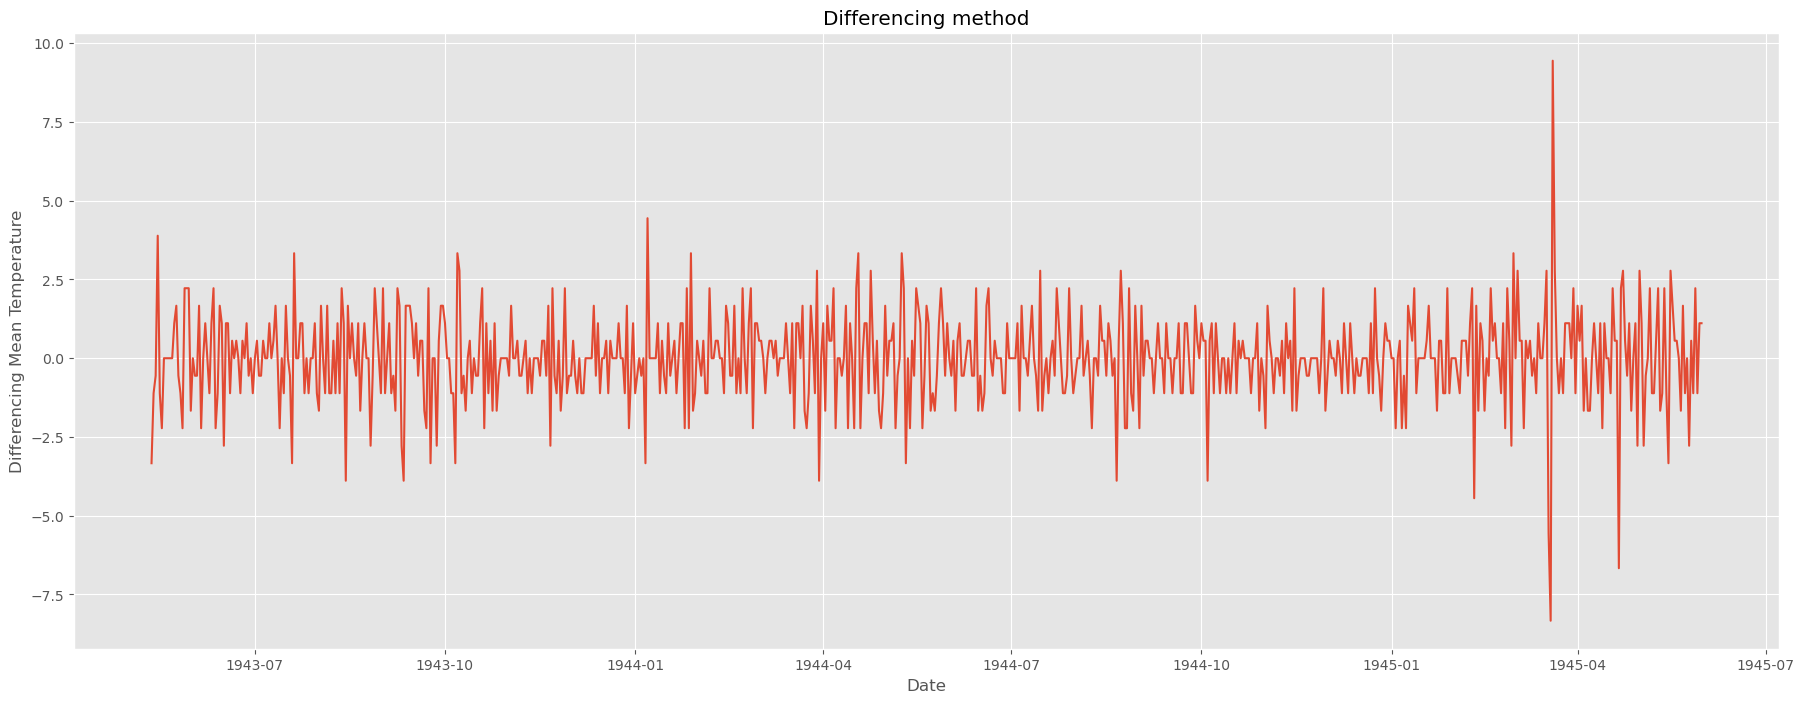

In [27]:
ts_diff=ts - ts.shift()
plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

In [29]:
result=adfuller(ts_diff[1:])
print('ADF Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' %(key,value))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


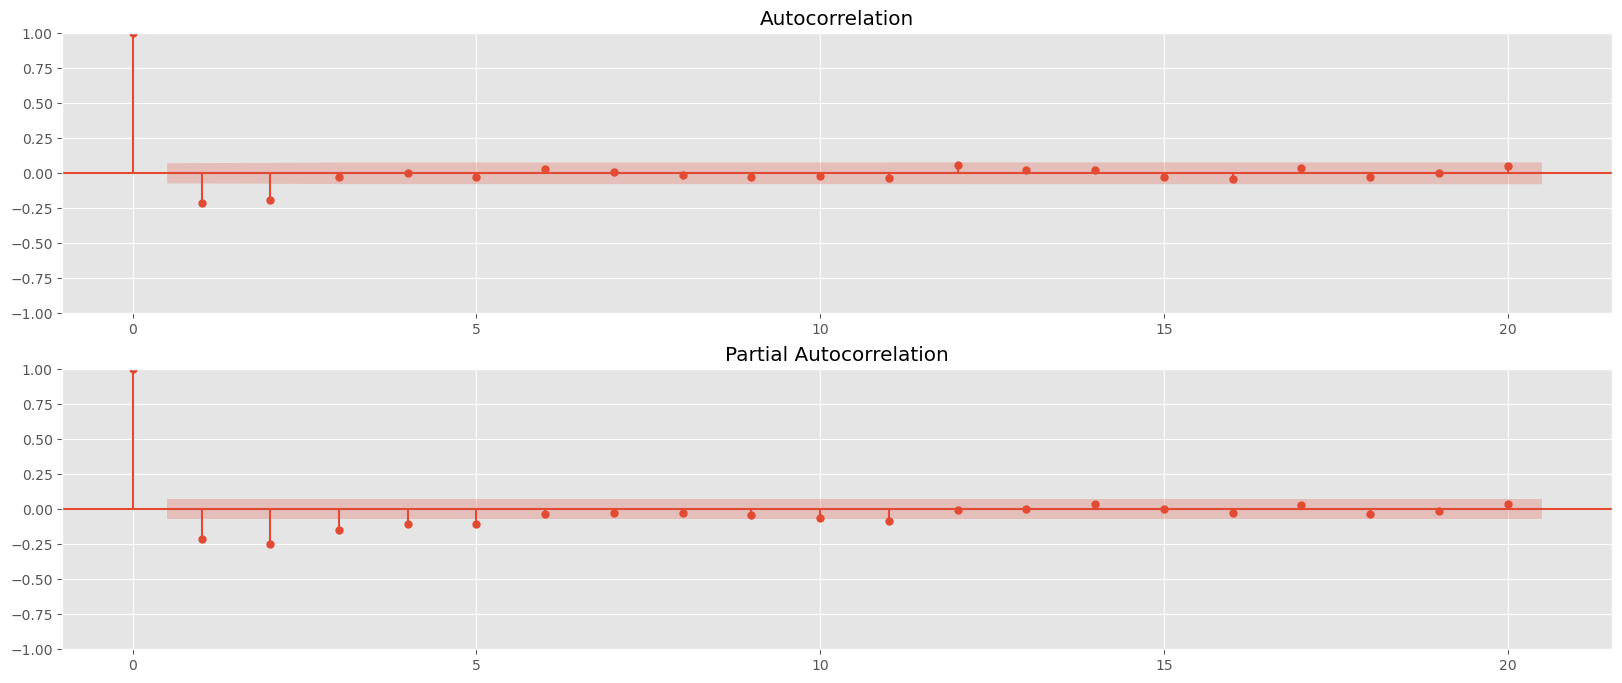

In [30]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(ts_diff[1:],lags=20,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(ts_diff[1:],lags=20,ax=ax2)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


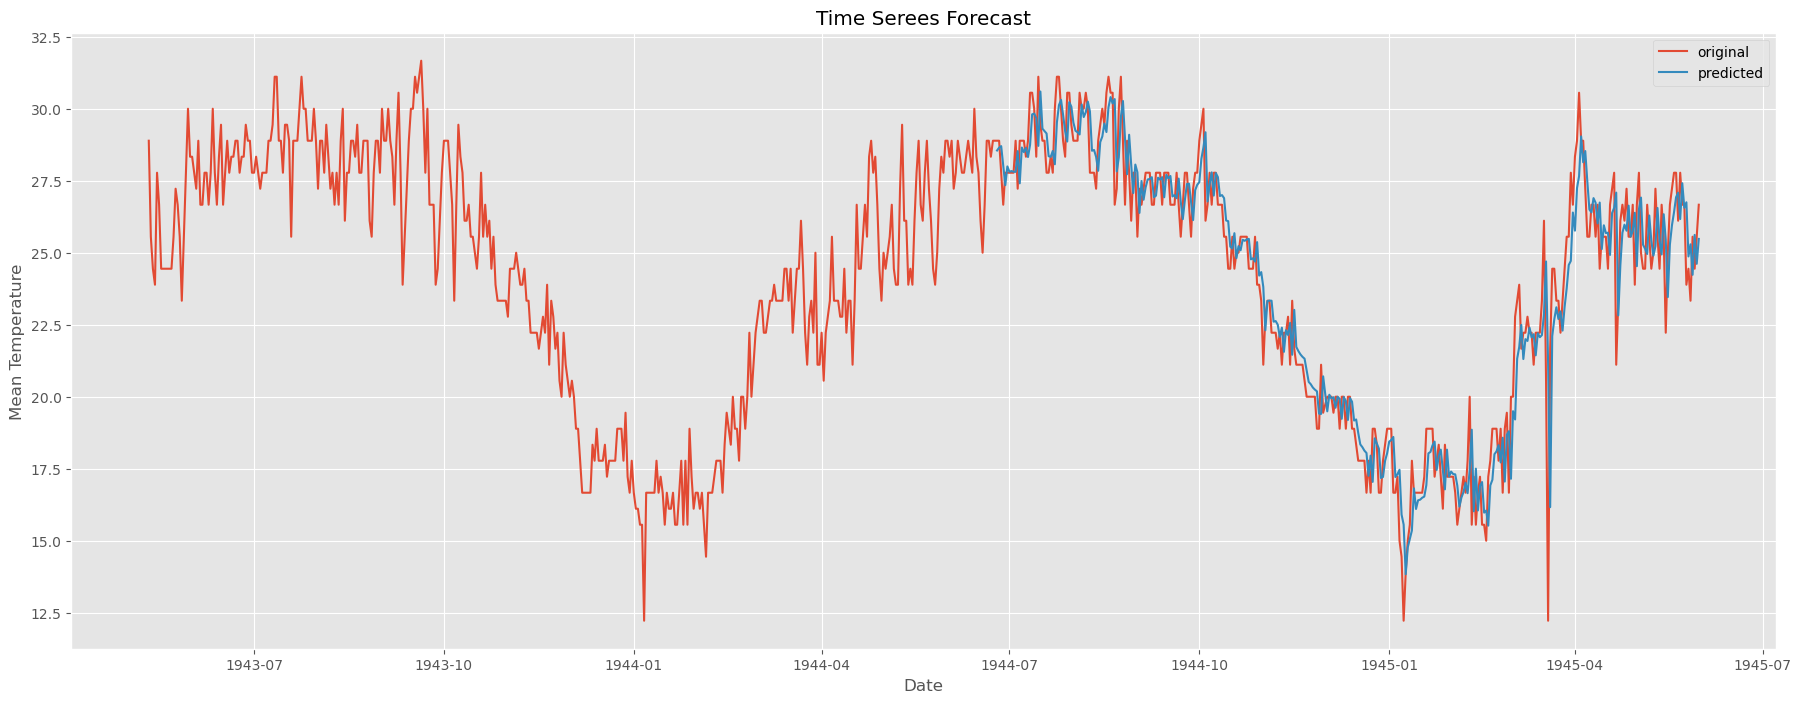

In [62]:
import statsmodels.api as sm
from pandas import datetime 

model=sm.tsa.arima.ARIMA(ts,order=(2,1,2))
model_fit=model.fit()

start_index=datetime(1944,6,25)
end_index=datetime(1945,5,31)
forecast=model_fit.predict(start=start_index,end=end_index, typ='levels')

plt.figure(figsize=(22,8))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label="original")
plt.plot(forecast,label="predicted")
plt.title("Time Serees Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


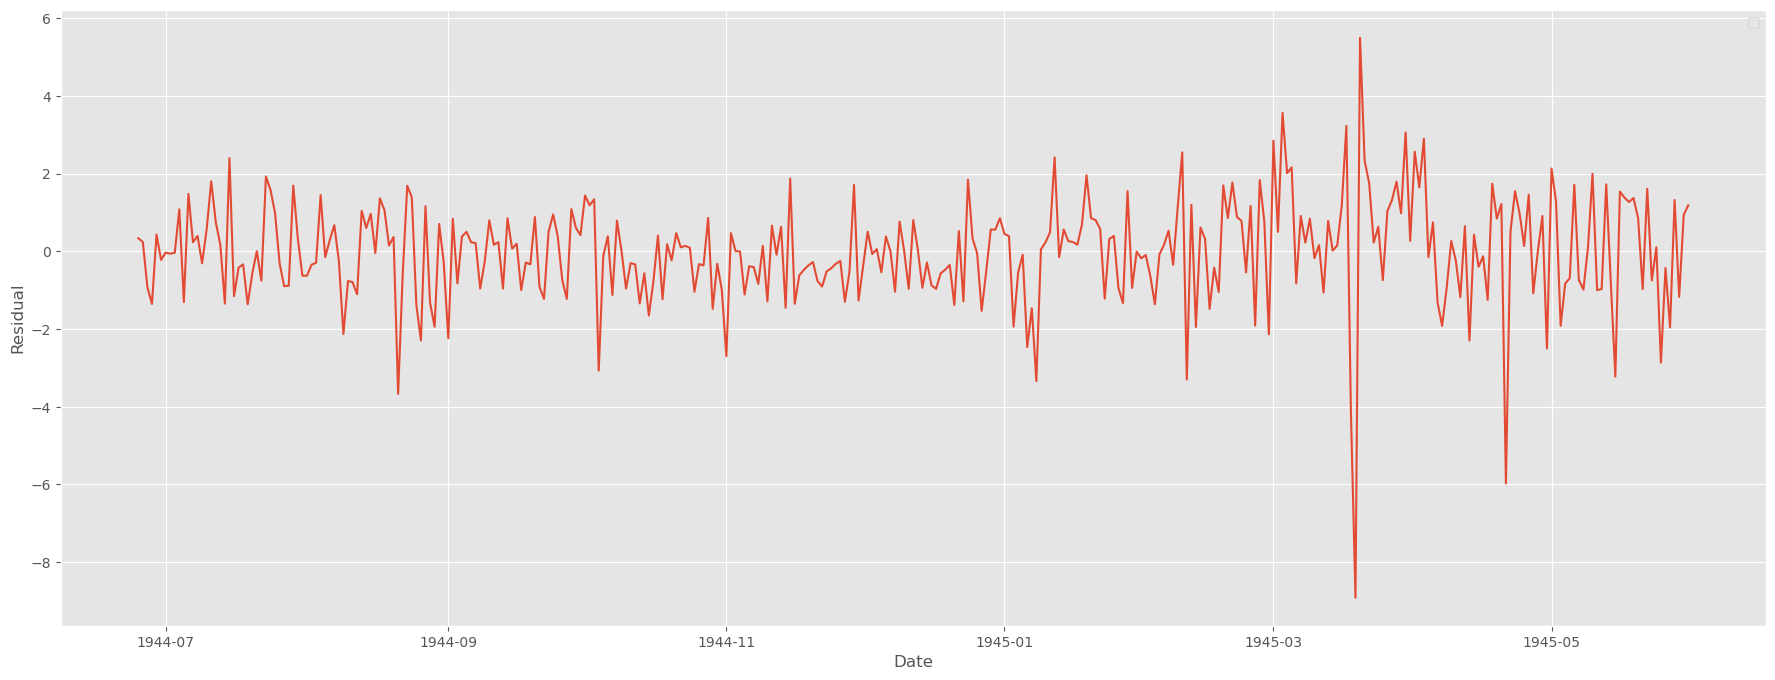

In [63]:
resi=np.array(weather_bin[weather_bin.Date>=start_index].MeanTemp) - np.array(forecast)

plt.figure(figsize=(22,8))
plt.plot(weather_bin.Date[weather_bin.Date>=start_index],resi)

plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.show()

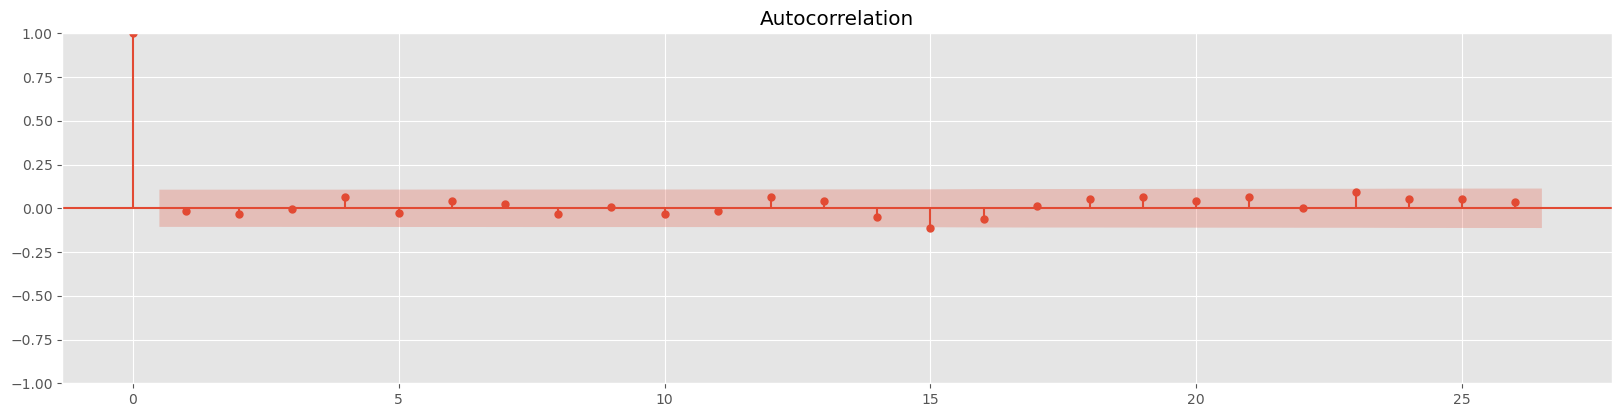

In [64]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(resi,ax=ax1)


In [65]:
result=adfuller(resi)
print('ADF Statistic: %f' %result[0])
print('p-value: %f'  %result[1])
print('Critical Values:')

for key,value in result[4].items():
    print('\t%s: %.3f' %(key,value))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [68]:

from sklearn.metrics import mean_absolute_error

def scoring(y_true,y_pred):
    r2=round(metrics.r2_score(y_true,y_pred)*100,3)
    corr=round(np.corrcoef(y_true,y_pred)[0,1],3)
    mape=round(metrics.mean_absolute_error(y_true,y_pred)*100,3)
    rmse=round(metrics.mean_absolute_error(y_true,y_pred,),3)
    
    df=pd.DataFrame({
        'R2':r2,
        "Corr": corr,
        "RMSE": rmse,
        "MAPE": mape
    },
                    index=[0])
    
    return df

In [69]:
scoring(np.array(weather_bin[weather_bin.Date>=start_index].MeanTemp),np.array(forecast))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,R2,Corr,RMSE,MAPE
0,91.018,0.954,0.988,98.835
